In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Sample data
df = pd.read_csv("Admission_prediction.csv")
df.head()

,Serial No.,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
df.isnull().sum()

,0
Serial No.,0
GRE_Score,18
TOEFL_Score,10
University Rating,15
SOP,0
LOR,0
CGPA,0
Research,0
Chance_of_Admit,0


In [4]:
# 1. Drop missing values
d1 = df.dropna()
d1.head()

,Serial No.,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
5,6,330.0,115.0,5.0,4.5,3.0,9.34,1,0.90


In [5]:
# 2. Fillna with a constant (e.g., 0)
d2 = df.fillna(0)
d2.head()

,Serial No.,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,0.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [6]:
# 3. Forward fill
d3 = df.fillna(method='ffill')
d3.head()

<ipython-input-6-ae07cd86a76e>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d3 = df.fillna(method='ffill')


,Serial No.,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,324.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [7]:
# 4. Backward fill
d4 = df.fillna(method='bfill')
d4.head()

<ipython-input-7-5d849c5ae7e8>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d4 = df.fillna(method='bfill')


,Serial No.,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,322.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [8]:
# 5. Interpolation (linear by default)
d5 = df.interpolate()
d5.head()

,Serial No.,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,323.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [9]:
# 6. Fill with mean
d6 = df.fillna(df.mean(numeric_only=True))
d6.head()

,Serial No.,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337.00000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.00000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,316.59751,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.00000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.00000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [10]:
# 7. Fill with median
d7 = df.fillna(df.median(numeric_only=True))
d7.head()

,Serial No.,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,317.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [11]:
# 8. Fill with mode
d8 = df.fillna(df.mode().iloc[0])
d8.head()

,Serial No.,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,312.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


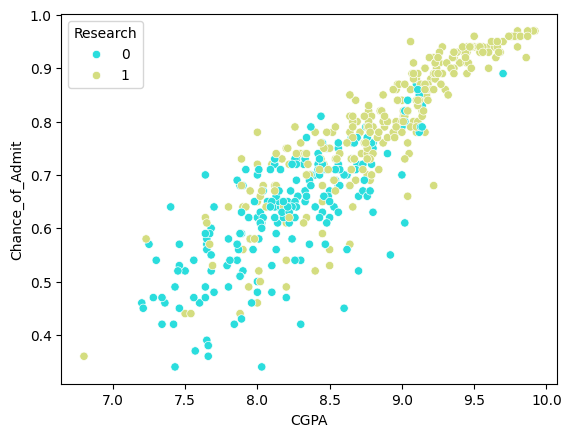

In [12]:
# Choose one cleaned DataFrame for visualization (e.g., interpolated)
dfinal = d5

# Scatter Plot: CGPA vs Chance_of_Admit
sns.scatterplot(x=dfinal['CGPA'], y=dfinal['Chance_of_Admit'], hue=dfinal['Research'],palette="rainbow")
plt.show()

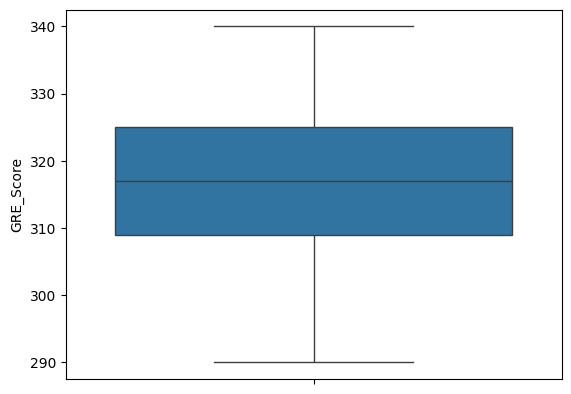

In [13]:
# Boxplot: GRE Score
sns.boxplot(dfinal['GRE_Score'])
plt.show()